This dataset provides information on immigration procedure of refugees based on their country of origin and country of residence between 1975 and 2016. By looking at the data, we are trying to answer a couple of questions using our data science capabilities.
http://data.un.org/Data.aspx?d=UNHCR&f=indID%3aType-Ref

Question 1) What has been the overall trend in number of refugees in the study period? what are the top 5 years with the highest and lowest number of refugees?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

In [3]:
df = pd.read_csv("UNdata_Refugee.csv")

In [7]:
df.columns = ['Country or territory of asylum or residence',
       'Country or territory of origin', 'Year', 'Refugees',
       'Refugees assisted by UNHCR',
       'Total refugees and people in refugee-like situations',
       'Total refugees and people in refugee-like situations assisted by UNHCR']

In [8]:
df.head(5)

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations,Total refugees and people in refugee-like situations assisted by UNHCR
0,Afghanistan,Iraq,2016.0,1.0,1.0,1.0,1.0
1,Afghanistan,Islamic Rep. of Iran,2016.0,33.0,33.0,33.0,33.0
2,Afghanistan,Pakistan,2016.0,59737.0,59737.0,59737.0,59737.0
3,Albania,China,2016.0,11.0,11.0,11.0,11.0
4,Albania,Dem. Rep. of the Congo,2016.0,3.0,3.0,3.0,3.0


In [9]:
year_refugees = df.groupby(df["Year"])["Refugees"].sum().sort_values()

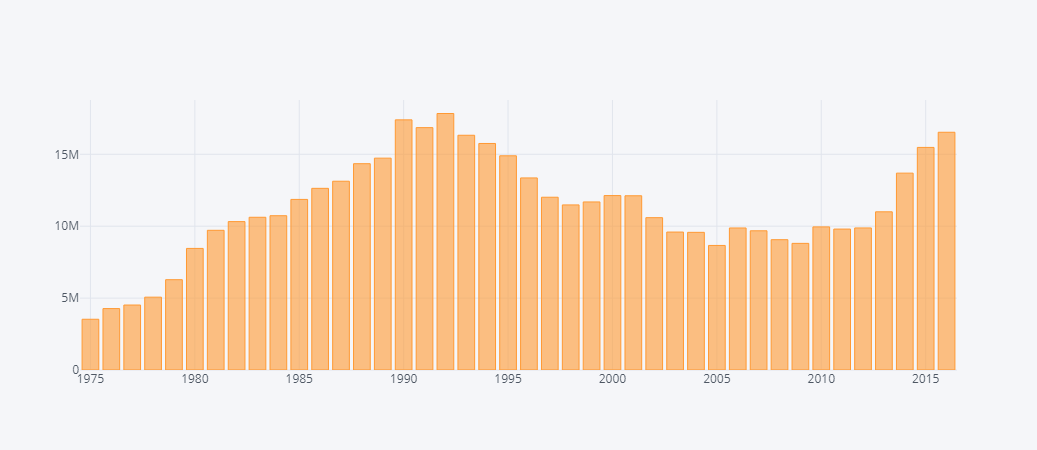

In [11]:
year_refugees.iplot(kind="bar")

In [12]:
year_refugees.head(5)

Year
1975.0    3529434.0
1976.0    4270631.0
1977.0    4518659.0
1978.0    5065844.0
1979.0    6279912.0
Name: Refugees, dtype: float64

In [13]:
year_refugees.tail(5)

Year
1993.0    16325525.0
2016.0    16533413.0
1991.0    16854795.0
1990.0    17395979.0
1992.0    17838074.0
Name: Refugees, dtype: float64

Question 2) In the year with maximum number of refugees (1992), natives of which countries had the highest and lowest number of refugees? Plot the top 10 countries in a histogram.

In [14]:
refugees_highest_year = df[df["Year"]==1992.0].groupby(df["Country or territory of origin"])["Refugees"].sum().sort_values()

In [15]:
refugees_highest_year.head(5)

Country or territory of origin
Kazakhstan    1.0
Greece        1.0
Grenada       1.0
Cabo Verde    1.0
Italy         1.0
Name: Refugees, dtype: float64

In [16]:
refugees_highest_year.tail(5)

Country or territory of origin
Somalia         812195.0
Iraq           1343824.0
Mozambique     1445474.0
Various        3118510.0
Afghanistan    4552153.0
Name: Refugees, dtype: float64

In [7]:
len(df["Country or territory of origin"].unique())

215

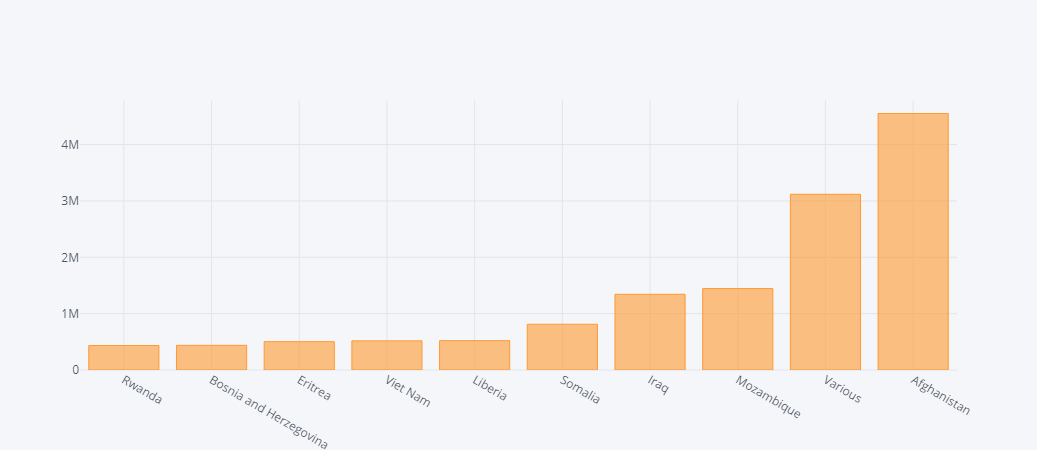

In [17]:
refugees_highest_year.tail(10).iplot(kind="bar")

Question 3) DO a similar analysis on Country of residence and plot the top 5 countries in a pie chart.

In [18]:
refugees_residence_highest_year = df[df["Year"]==1992.0].groupby(df["Country or territory of asylum or residence"])["Refugees"].sum().sort_values()

In [20]:
x = refugees_residence_highest_year.tail(5)

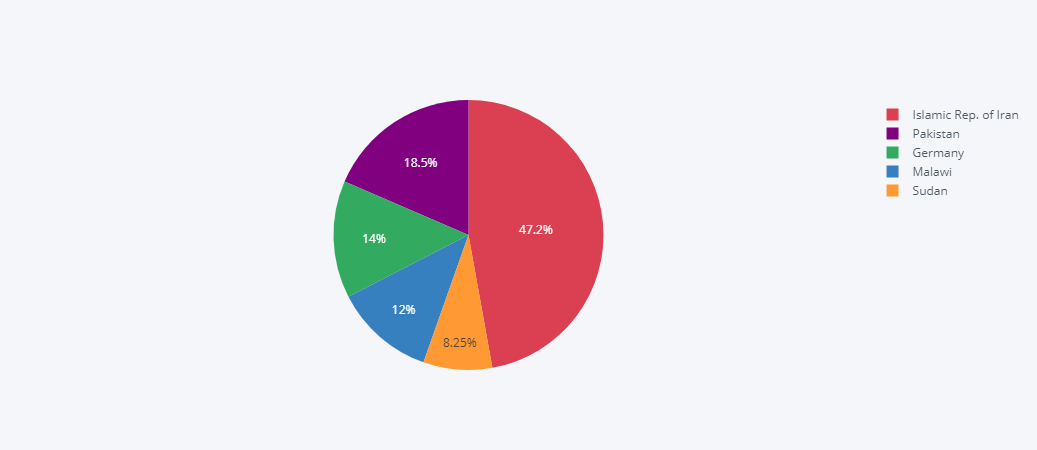

In [23]:
x.reset_index().iplot(kind="pie", labels="Country or territory of asylum or residence", values="Refugees")

In [22]:
x.reset_index()

,Country or territory of asylum or residence,Refugees
0,Sudan,725900.0
1,Malawi,1058498.0
2,Germany,1236000.0
3,Pakistan,1629218.0
4,Islamic Rep. of Iran,4150723.0


Question 4) In order to evaluate the efficiency of UNCHR procedure, we are interested in knowing the percentage of refugees being helped by the UNCHR process based on year, country of origin, and country of residence.

In [25]:
df["UNCHR Ratio"] = round(df["Total refugees and people in refugee-like situations assisted by UNHCR"]/df["Total refugees and people in refugee-like situations"],6)

In [26]:
df_filtered = df[df["UNCHR Ratio"]<=1]

In [27]:
df_filtered.sort_values(by=["UNCHR Ratio"],ascending=False).head(5)

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations,Total refugees and people in refugee-like situations assisted by UNHCR,UNCHR Ratio
0,Afghanistan,Iraq,2016.0,1.0,1.0,1.0,1.0,1.0
42329,Libya,State of Palestine,2008.0,2842.0,2842.0,2842.0,2842.0,1.0
42425,Mali,Mauritania,2008.0,6157.0,6157.0,6157.0,6157.0,1.0
42424,Mali,Liberia,2008.0,82.0,82.0,82.0,82.0,1.0
42423,Mali,Guinea-Bissau,2008.0,19.0,19.0,19.0,19.0,1.0


In [28]:
df_filtered.sort_values(by=["UNCHR Ratio"],ascending=True).head(5)

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations,Total refugees and people in refugee-like situations assisted by UNHCR,UNCHR Ratio
1050,China,Viet Nam,2016.0,317098.0,1.0,317098.0,1.0,0.000003
6431,China,Viet Nam,2015.0,300896.0,1.0,300896.0,1.0,0.000003
17026,China,Viet Nam,2013.0,300896.0,1.0,300896.0,1.0,0.000003
22023,China,Viet Nam,2012.0,300897.0,1.0,300897.0,1.0,0.000003
26911,China,Viet Nam,2011.0,300897.0,1.0,300897.0,1.0,0.000003


Question 4) Now we desire to do the same analysis but aggregate it over the years. In particular, we want to see what counties of residence are the best to pursue immigration through UNCHR application. 

In [36]:
df_country_residence = df.groupby(df["Country or territory of asylum or residence"]).agg({"Total refugees and people in refugee-like situations": "sum", "Total refugees and people in refugee-like situations assisted by UNHCR": "sum"})

In [30]:
df_country_residence["aggregate UNCHR Ratio"] = df_country_residence['Total refugees and people in refugee-like situations assisted by UNHCR'] / df_country_residence['Total refugees and people in refugee-like situations']

In [32]:
df_country_residence.sort_values(by=["aggregate UNCHR Ratio"], ascending=False).head(10)

,Total refugees and people in refugee-like situations,Total refugees and people in refugee-like situations assisted by UNHCR,aggregate UNCHR Ratio
Country or territory of asylum or residence,,,
Seychelles,2.0,2.0,1.0
Barbados,2.0,2.0,1.0
Palau,16.0,16.0,1.0
Samoa,3.0,3.0,1.0
Anguilla,2.0,2.0,1.0
Antigua and Barbuda,19.0,19.0,1.0
Saint Kitts and Nevis,1.0,1.0,1.0
Turks and Caicos Islands,16.0,16.0,1.0
Aruba,4.0,4.0,1.0


In [ ]:
Question 5) For Iranian citizens, which countries have the highest rate of UNCHR immigration rate?

In [33]:
df_Iran = df[df["Country or territory of origin"]=="Islamic Rep. of Iran"].groupby(df["Country or territory of asylum or residence"]).agg({"Total refugees and people in refugee-like situations":"sum","Total refugees and people in refugee-like situations assisted by UNHCR":"sum"})

In [38]:
df_Iran["aggregate UNCHR Ratio"] = df_Iran['Total refugees and people in refugee-like situations assisted by UNHCR'] / df_Iran['Total refugees and people in refugee-like situations']

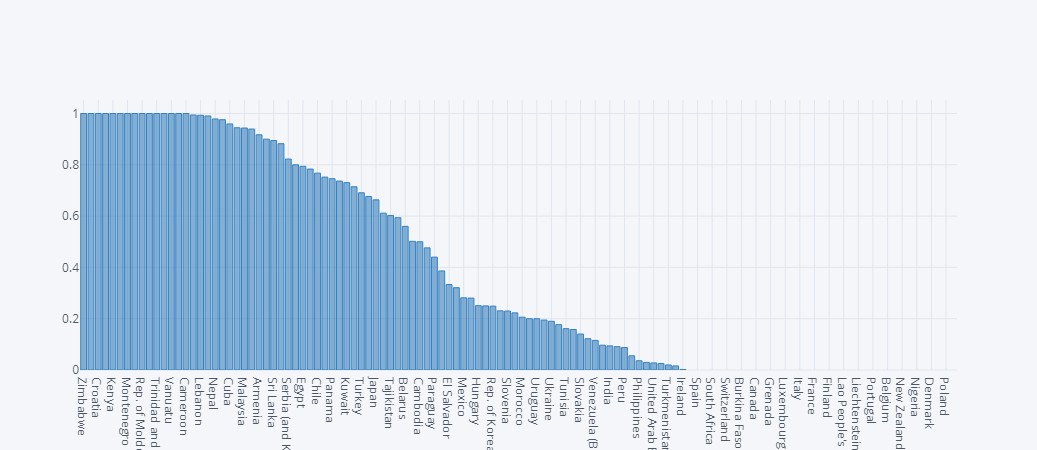

In [39]:
df_Iran.sort_values(by=["aggregate UNCHR Ratio"],ascending=False)["aggregate UNCHR Ratio"].iplot(kind="bar",color="blue")

Question 6) In the past 10 years, What has been the trend in number of refugees processed by UNCHR? What is the average number of refugees processed by UNCHR per year in the past 10 years?

In [44]:
df["Year"]

0        2016.0
1        2016.0
2        2016.0
3        2016.0
4        2016.0
5        2016.0
6        2016.0
7        2016.0
8        2016.0
9        2016.0
10       2016.0
11       2016.0
12       2016.0
13       2016.0
14       2016.0
15       2016.0
16       2016.0
17       2016.0
18       2016.0
19       2016.0
20       2016.0
21       2016.0
22       2016.0
23       2016.0
24       2016.0
25       2016.0
26       2016.0
27       2016.0
28       2016.0
29       2016.0
          ...  
96034    1975.0
96035    1975.0
96036    1975.0
96037    1975.0
96038    1975.0
96039    1975.0
96040    1975.0
96041    1975.0
96042    1975.0
96043    1975.0
96044    1975.0
96045    1975.0
96046    1975.0
96047    1975.0
96048    1975.0
96049    1975.0
96050    1975.0
96051    1975.0
96052    1975.0
96053    1975.0
96054    1975.0
96055    1975.0
96056    1975.0
96057    1975.0
96058    1975.0
96059    1975.0
96060    1975.0
96061       NaN
96062       NaN
96063       NaN
Name: Year, Length: 9606

In [42]:
df["Year"] = df["Year"].astype(np.float32)

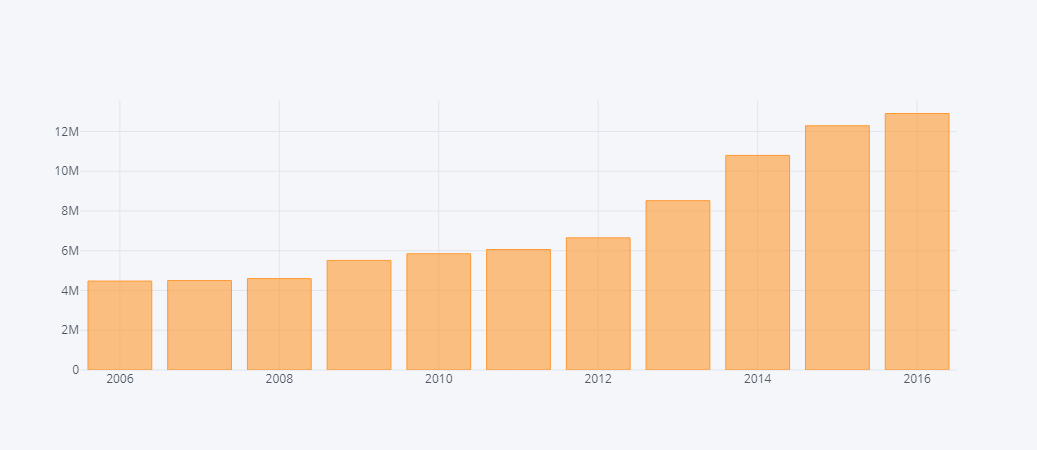

In [23]:
df[df["Year"]>2005].groupby(df["Year"])["Total refugees and people in refugee-like situations assisted by UNHCR"].sum().iplot(kind="bar")

In [24]:
df[df["Year"]>2005]["Total refugees and people in refugee-like situations assisted by UNHCR"].sum()/10

8215011.5